# Ridge regression


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import pickle
import os
import scipy.stats as st

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.


In [3]:
model_name = "ridge"
aml_dir = './data/'
train = pd.read_csv(os.path.join(aml_dir, 'nyc_demand_train.csv'), parse_dates=['timeStamp'])

Create model pipeline:
- **one-hot encode categorical variables**
- **randomized parameter search** with cross validation to find optimal values for the alpha parameter

Fitting this pipeline should take less than a minute.

In [4]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [5]:
cat_cols = ['hour', 'month', 'dayofweek']
cat_cols_idx = [X.columns.get_loc(c) for c in X.columns if c in cat_cols]
onehot = OneHotEncoder(categorical_features=cat_cols_idx, sparse=False)
regr = Ridge(fit_intercept=False)
tscv = TimeSeriesSplit(n_splits=3)

In [6]:
param_dist = {'alpha': st.uniform(1e-4, 10.0)}
regr_cv = RandomizedSearchCV(estimator=regr,
                            param_distributions=param_dist,
                            n_iter=100,
                            scoring='neg_mean_squared_error',
                            iid=False,
                            cv=tscv,
                            verbose=2,
                            n_jobs=-1)
regr_pipe = Pipeline([('onehot', onehot), ('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] alpha=8.719865191814092 .........................................
[CV] alpha=8.719865191814092 .........................................
[CV] .......................... alpha=8.719865191814092, total=   1.8s
[CV] alpha=8.719865191814092 .........................................
[CV] .......................... alpha=8.719865191814092, total=   2.8s
[CV] alpha=9.715969183935938 .........................................
[CV] .......................... alpha=9.715969183935938, total=   0.1s
[CV] alpha=9.715969183935938 .........................................
[CV] .......................... alpha=9.715969183935938, total=   0.5s
[CV] alpha=9.715969183935938 .........................................
[CV] .......................... alpha=8.719865191814092, total=   1.8s
[CV] alpha=6.206227574700966 .........................................
[CV] .......................... alpha=9.715969183935938, total=   0.1s
[CV] alpha=6.2

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.2s


[CV] alpha=6.510834921800346 .........................................
[CV] .......................... alpha=6.510834921800346, total=   0.2s
[CV] alpha=6.510834921800346 .........................................
[CV] .......................... alpha=2.571754496478655, total=   0.5s
[CV] alpha=6.510834921800346 .........................................
[CV] .......................... alpha=6.510834921800346, total=   0.2s
[CV] alpha=4.430470528362796 .........................................
[CV] .......................... alpha=6.510834921800346, total=   0.2s
[CV] alpha=4.430470528362796 .........................................
[CV] .......................... alpha=4.430470528362796, total=   0.1s
[CV] alpha=4.430470528362796 .........................................
[CV] .......................... alpha=4.430470528362796, total=   0.1s
[CV] alpha=4.312729384162701 .........................................
[CV] .......................... alpha=4.430470528362796, total=   0.2s
[CV] a

[CV] alpha=4.320840801219907 .........................................
[CV] .......................... alpha=4.320840801219907, total=   0.2s
[CV] .......................... alpha=4.320840801219907, total=   0.1s
[CV] alpha=4.320840801219907 .........................................
[CV] alpha=0.4264411863860622 ........................................
[CV] ......................... alpha=0.4264411863860622, total=   0.1s
[CV] alpha=0.4264411863860622 ........................................
[CV] ......................... alpha=0.4264411863860622, total=   0.1s
[CV] alpha=0.4264411863860622 ........................................
[CV] .......................... alpha=4.320840801219907, total=   0.4s
[CV] alpha=3.3468825538503926 ........................................
[CV] ......................... alpha=0.4264411863860622, total=   0.2s
[CV] alpha=3.3468825538503926 ........................................
[CV] ......................... alpha=3.3468825538503926, total=   0.1s
[CV] .

[CV] alpha=9.087881127167352 .........................................
[CV] .......................... alpha=9.087881127167352, total=   0.1s
[CV] alpha=3.627106339905034 .........................................
[CV] .......................... alpha=9.087881127167352, total=   0.1s
[CV] .......................... alpha=3.627106339905034, total=   0.1s
[CV] alpha=3.627106339905034 .........................................
[CV] alpha=3.627106339905034 .........................................
[CV] .......................... alpha=3.627106339905034, total=   0.1s
[CV] .......................... alpha=3.627106339905034, total=   0.1s
[CV] alpha=2.311853061662393 .........................................
[CV] alpha=2.311853061662393 .........................................
[CV] .......................... alpha=2.311853061662393, total=   0.1s


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   23.4s


[CV] .......................... alpha=2.311853061662393, total=   0.1s
[CV] alpha=2.311853061662393 .........................................
[CV] alpha=1.0628398037962676 ........................................
[CV] .......................... alpha=2.311853061662393, total=   0.1s
[CV] alpha=1.0628398037962676 ........................................
[CV] ......................... alpha=1.0628398037962676, total=   0.1s
[CV] alpha=1.0628398037962676 ........................................
[CV] ......................... alpha=1.0628398037962676, total=   0.1s
[CV] alpha=5.1416763551433675 ........................................
[CV] ......................... alpha=5.1416763551433675, total=   0.1s
[CV] ......................... alpha=1.0628398037962676, total=   0.1s
[CV] alpha=5.1416763551433675 ........................................
[CV] alpha=5.1416763551433675 ........................................
[CV] ......................... alpha=5.1416763551433675, total=   0.1s
[CV] a

[CV] alpha=3.021547525796952 .........................................
[CV] .......................... alpha=3.021547525796952, total=   0.1s
[CV] alpha=3.021547525796952 .........................................
[CV] .......................... alpha=3.021547525796952, total=   0.3s
[CV] alpha=3.021547525796952 .........................................
[CV] ......................... alpha=0.4414904094521448, total=   0.8s
[CV] alpha=6.786433069915404 .........................................
[CV] .......................... alpha=3.021547525796952, total=   0.1s
[CV] .......................... alpha=6.786433069915404, total=   0.0s
[CV] alpha=6.786433069915404 .........................................
[CV] .......................... alpha=6.786433069915404, total=   0.1s
[CV] alpha=6.786433069915404 .........................................
[CV] alpha=2.8257447976406245 ........................................
[CV] .......................... alpha=6.786433069915404, total=   0.1s
[CV] a

[CV] ......................... alpha=1.4254795650258283, total=   0.1s
[CV] alpha=4.396216371096376 .........................................
[CV] alpha=4.396216371096376 .........................................
[CV] .......................... alpha=4.396216371096376, total=   0.1s
[CV] alpha=7.430767510255428 .........................................
[CV] .......................... alpha=4.396216371096376, total=   0.1s
[CV] alpha=7.430767510255428 .........................................
[CV] .......................... alpha=7.430767510255428, total=   0.1s
[CV] alpha=7.430767510255428 .........................................
[CV] .......................... alpha=7.430767510255428, total=   0.1s
[CV] alpha=3.6345029365845356 ........................................
[CV] .......................... alpha=7.430767510255428, total=   0.1s
[CV] alpha=3.6345029365845356 ........................................
[CV] ......................... alpha=3.6345029365845356, total=   0.1s
[CV] a

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   38.3s finished


Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=[2, 3, 4], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise',
          estimator=Ridge(...=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2))])

In [7]:
with open(os.path.join(aml_dir, model_name + '.pkl'), 'wb') as f:
    pickle.dump(regr_pipe, f)

Cross validation results

In [8]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score').head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
24,0.127726,0.004331,-3878.856338,-4220.641068,6.26321,{'alpha': 6.263209830097212},1,-4167.563179,-4383.392481,-3679.064252,-4237.613401,-3789.941583,-4040.917321,0.089823,0.001917,209.104720,140.329027
2,0.192915,0.004499,-3878.857040,-4220.563361,6.20623,{'alpha': 6.206227574700966},2,-4167.475844,-4383.231023,-3679.099167,-4237.565137,-3789.996110,-4040.893923,0.062667,0.002309,209.045678,140.274654
43,0.095875,0.011486,-3878.857942,-4220.505197,6.16338,{'alpha': 6.163379969739004},3,-4167.410865,-4383.110115,-3679.125671,-4237.529042,-3790.037292,-4040.876434,0.019492,0.007618,209.001497,140.233927
25,0.064570,0.006273,-3878.858739,-4220.937833,6.47818,{'alpha': 6.478176513432426},4,-4167.901973,-4384.008323,-3678.935922,-4237.798151,-3789.738322,-4041.007024,0.025434,0.004864,209.330339,140.536296
99,0.120866,0.005601,-3878.859234,-4220.960199,6.49421,{'alpha': 6.49421385561642},5,-4167.927830,-4384.054689,-3678.926561,-4237.812102,-3789.723312,-4041.013806,0.040846,0.005475,209.347351,140.551893


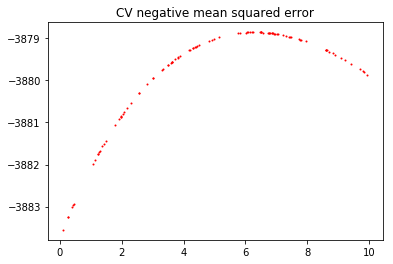

In [9]:
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], 'ro', markersize=1)
plt.title('CV negative mean squared error')
plt.show()